In [2]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

import scipy.stats as stats 
from scipy.stats import chi2_contingency

from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm 

## Hypothesis Testing

Here we use data from an insurance company. The data includes the following columns: `[Age, Sex, BMI, Children, Smoker, Region, Charges]`. So the data represents risk factors for insurance.

In [5]:
data = pd.read_csv("./data/insurance.csv")
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [9]:
data.describe().drop(labels=['count'])

,age,bmi,children,charges
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


For this data we will take `charges` to be the response variable and the other columns to be the predictor variables. This notebook will analyse the effect of the predictor variables on the overall charges.

## Steps of Hypothesis Testing

### 1. Choose sample statistic
First we will compare the BMI off male and female insurance customers. The value we will compare is the mean: $\mu_{male}$ and $\mu_{female}$

### 2. Define hypotheses
$H_0$ => $\mu_{male} - \mu_{female} = 0$ \
$H_A$ => $\mu_{male} - \mu_{female} \neq 0$

In words, the null hypothesis asserts that there is no difference between means, while the alternative hypothesis asserts that there is a difference. The `=`-sign implies that this is a 2-tailed test.

### 3. Decision Criteria
We set $\alpha=0.05$, which we will have to divide by 2 because we have a 2-tailed test. If the later calculated p-value is lower than $\alpha$ we can reject the null hypothesis.

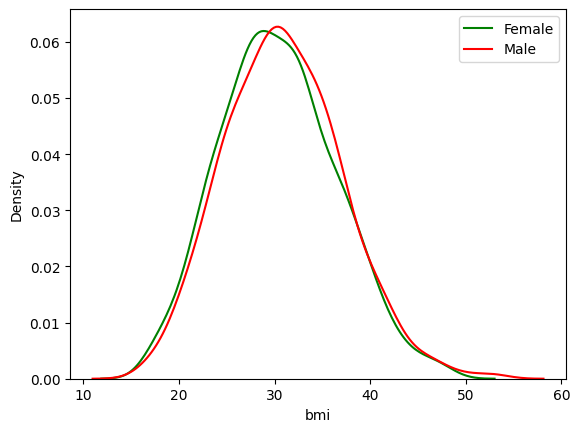

In [ ]:
f = data.loc[data.sex=="female"]
m = data.loc[data.sex=="male"]
f_bmi = f["bmi"]
m_bmi = m["bmi"]

plt.figure()
# https://seaborn.pydata.org/tutorial/distributions.html#tutorial-kde
sns.kdeplot(f_bmi, color='green', label="Female")
sns.kdeplot(m_bmi, color='red', label="Male")
plt.legend()

In [24]:
f"Male BMI mean: {m_bmi.mean():.2f}, Female BMI mean: {f_bmi.mean():.2f}"

'Male BMI mean: 30.94, Female BMI mean: 30.38'

As we can see from the distribution and the mean of both datasets, they are extremely similar. But let's gather some stats to confirm.

In [ ]:
alpha=0.05
# Calculate the T-test for the means of two independent samples of scores.
t_1, p_1 = stats.ttest_ind(m_bmi, f_bmi)
f"{t_1=}, {p_1=}"

't_1=np.float64(1.696752635752224), p_1=np.float64(0.08997637178984934)'

In [ ]:
if p_1 <alpha:
    print(f"Conclusion: since p_value {p_1:.2f} is less than alpha {alpha}")
    print("Reject the null hypothesis that there is no difference between bmi of females and bmi of males.") 
else:
    print(f"Conclusion: since p_value {p_1:.2f} is greater than alpha {alpha}")
    print("Fail to reject the null hypothesis that there is a difference between bmi of females and bmi of males.")

Conclusion: since p_value 0.09 is greater than alpha 0.05
Fail to reject the null hypothesis that there is a difference between bmi of females and bmi of males.


## What about smoking?

Now lets investigate whether smoking is a possible risk factor for making greater claims. For this we will again compare mean values, but now the claim size divided over the smoker/non-smoker categories. First we inspect the means of the data, which already shows quite a large divide.

Then we formulate the hypotheses:

**H_0** => $\mu_{smoker} <= \mu_{non-smoker}$ \
**H_A** => $\mu_{smoker} > \mu_{non-smoker}$ 

To check out hypothesis we will use a t-test. If the z-values of a t-test fall into the right area of the distribution, we reject the null hypothesis.

In [30]:
smokers = data.loc[data.smoker=="yes"]
smoker_charges = smokers.charges
smoker_charges_mean = smoker_charges.mean()
non_smokers = data.loc[data.smoker=="no"]
non_smoker_charges = non_smokers.charges
non_smoker_charges_mean = non_smoker_charges.mean()

f"The mean value of charges for: Smokers={smoker_charges_mean:.2f}, Non-Smokers={non_smoker_charges_mean:.2f}"

'The mean value of charges for: Smokers=32050.23, Non-Smokers=8434.27'

[Text(0.5, 1.0, 'Fig:1 Smoker vs Charges')]

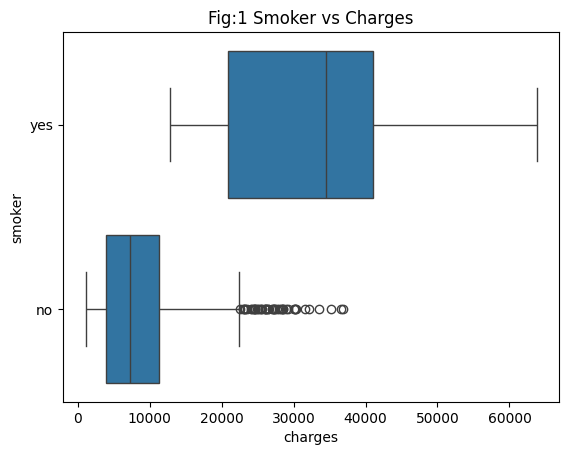

In [31]:
sns.boxplot(x=data.charges, y=data.smoker, data=data).set(title="Fig:1 Smoker vs Charges")

In [ ]:
alpha=0.05
t_val2, p_value2 = stats.ttest_ind(smoker_charges, non_smoker_charges)
p_value_onetail=p_value2/2
print("t_value = {} , p_value = {} , p_value_onetail = {}".format(t_val2, p_value2, p_value_onetail))

t_value = 46.66492117272371 , p_value = 8.271435842179102e-283 , p_value_onetail = 4.135717921089551e-283
